<a href="https://colab.research.google.com/github/aanyajain1/data_science_project/blob/main/ids_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
!pip install pandas-profiling


In [3]:
!pip install --upgrade typing-extensions


In [4]:
!pip install -U typing-extensions


In [5]:
df=pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')




In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
len(df.columns)

18



    The decision to drop certain columns from the dataset depends on the specific analysis goals and the relevance of each column to those goals.

    In this case, I decided to drop the 'Administrative', 'Informational', and 'ProductRelated' columns because they represent the number of pages visited by the user in each of these categories, and the total number of pages visited is already captured by the 'PageValues' column. Therefore, these columns were considered redundant and not useful for the analysis.



In [10]:
df=df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)



    In the dataset, there are some columns with categorical variables, such as 'Month', 'VisitorType', 'OperatingSystem', and 'Browser'.

    Machine learning algorithms generally require numerical inputs, so we need to convert these categorical variables into numerical format.

    Label encoding and one-hot encoding are two techniques to achieve this conversion

    Label encoding assigns a unique numerical value to each category of a variable. For example, for the 'Month' column, we can assign a numerical value of 1 for January, 2 for February, and so on. Label encoding is suitable for categorical variables that have a natural ordering, such as 'Month' and 'VisitorType'.

    One-hot encoding, on the other hand, creates a new binary column for each category of a variable.



In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [13]:
df['Month'] = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [14]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


Now let's explore the duplicated data

In [15]:
df.duplicated().value_counts()

False    12157
True       173
dtype: int64

In [16]:
# Use the `duplicated` function to identify duplicated rows
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)



       Administrative_Duration  Informational_Duration  \
158                        0.0                     0.0   
159                        0.0                     0.0   
178                        0.0                     0.0   
330                        0.0                     0.0   
356                        0.0                     0.0   
...                        ...                     ...   
11939                      0.0                     0.0   
12159                      0.0                     0.0   
12180                      0.0                     0.0   
12185                      0.0                     0.0   
12301                      0.0                     0.0   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                        0.0          0.2        0.2         0.0   
159                        0.0          0.2        0.2         0.0   
178                        0.0          0.2        0.2         0.0   
330                    

We need to drop duplicated values from the dataset as they can affect the accuracy of the model. Duplicated values can cause bias in the data, which can lead to incorrect predictions. Hence, we will drop them before performing any analysis or building a model.

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

The MinMaxScaler is a preprocessing technique that scales all the values in a given feature to be in the range of 0 and 1. This is done to bring all the features to a common scale and avoid one feature dominating the others in a model that uses distance-based algorithms. The fit_transform() method of the scaler object fits the scaler to the data and transforms the data using the scaler in one step.

# Exploratory Data Analysis


To effectively communicate insights and patterns in data to facilitate understanding and decision-making.

In [19]:
import pandas as pd

# Group the data by traffic type
grouped_data = df.groupby('TrafficType')

# Calculate average revenue per traffic type
average_revenue = grouped_data['Revenue'].mean()

# Calculate total revenue per traffic type
total_revenue = grouped_data['Revenue'].sum()

# Compare revenue across traffic types
revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

# Print the revenue comparison
print(revenue_comparison)

             Average Revenue  Total Revenue
TrafficType                                
1                   0.110455            262
2                   0.216624            847
3                   0.090000            180
4                   0.155075            165
5                   0.215385             56
6                   0.119910             53
7                   0.300000             12
8                   0.277778             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.060140             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


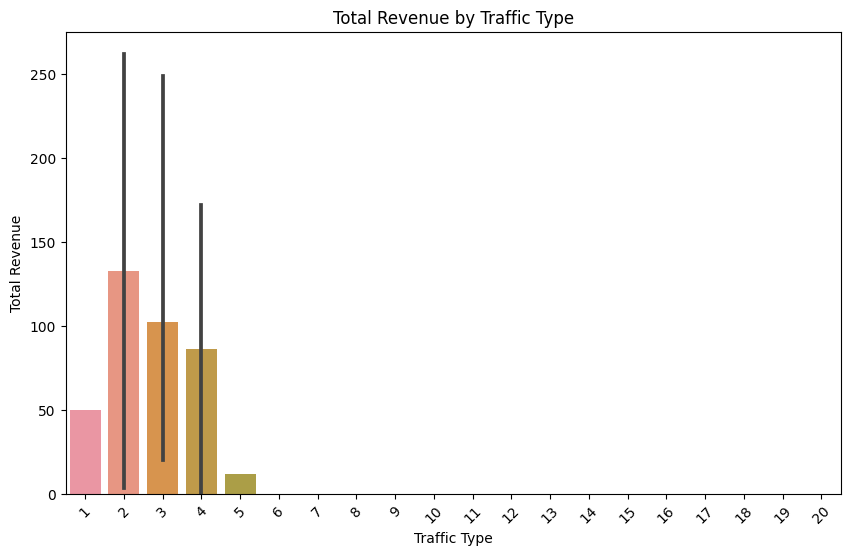

In [20]:
# Sort the revenue comparison dataframe in descending order based on the revenue metric
revenue_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualize the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



Traffic Type 2 and Traffic Type 3 generate the highest total revenue, indicating that these two traffic sources are driving the most valuable traffic to the website.
It is important to focus on optimizing and maximizing the traffic from Traffic Type 2 and Traffic Type 3, as they have shown to be the most valuable sources of revenue for the website.


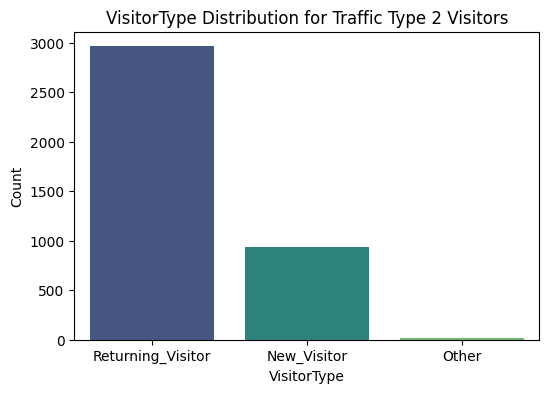

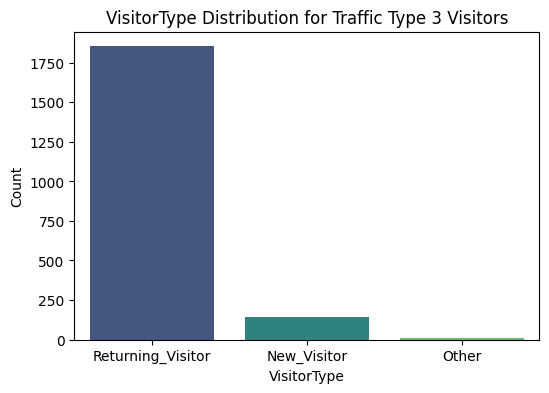

In [21]:
# Filter the dataset for Traffic Type 2 visitors
traffic_type_2_data = df[df['TrafficType'] == 2]

# Filter the dataset for Traffic Type 3 visitors
traffic_type_3_data = df[df['TrafficType'] == 3]

# Demographic analysis
demographic_variables = ['VisitorType']

for variable in demographic_variables:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.countplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

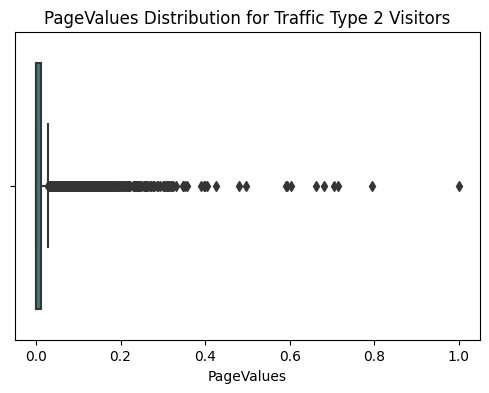

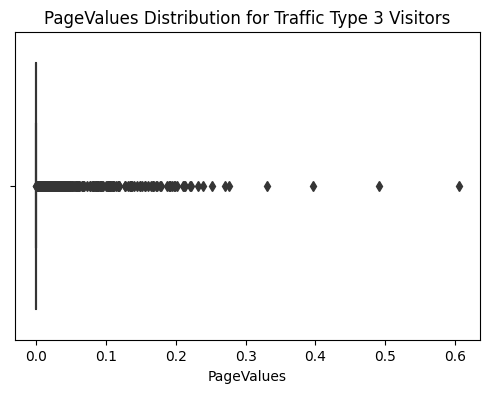

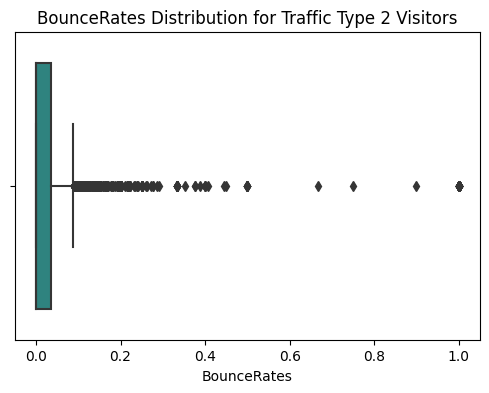

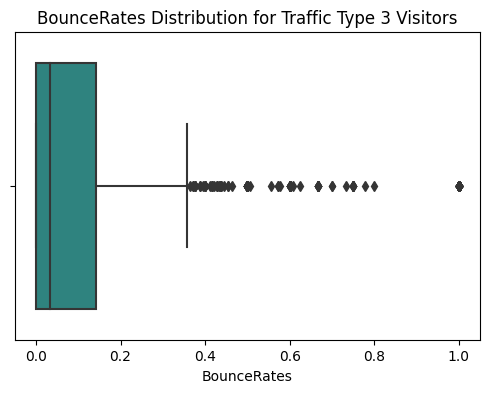

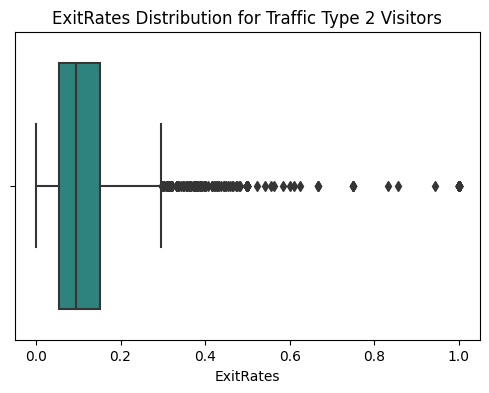

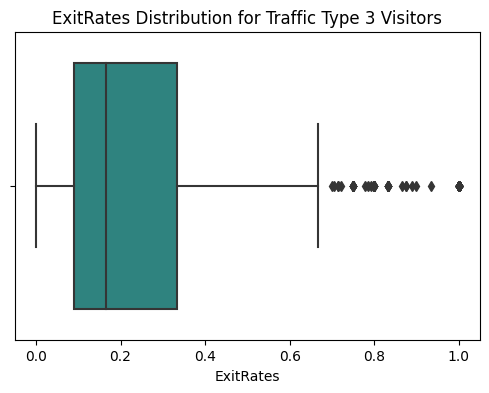

In [22]:
# Behavioral analysis
behavioral_variables = ['PageValues', 'BounceRates', 'ExitRates']

for variable in behavioral_variables:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=traffic_type_2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(data=traffic_type_3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.show()



From the demographic analysis:

    For Traffic Type 2 visitors,Visitors from Traffic Type 2 are primarily Returning Visitors.

    For Traffic Type 3 visitors,Visitors from Traffic Type 3 are also primarily Returning Visitors.

From the behavioral analysis:

    The average page values for Traffic Type 2 visitors are higher compared to Traffic Type 3 visitors, indicating that visitors from Traffic Type 2 are more likely to generate revenue on the website.

-The bounce rates and exit rates for Traffic Type 2 visitors are relatively low compared to other traffic types. This suggests that visitors coming from Traffic Type 2 have a higher level of engagement and are more likely to explore multiple pages before leaving the website. This makes them a valuable traffic source for revenue generation.

-The bounce rates and exit rates for Traffic Type 3 visitors are relatively high compared to other traffic types. This suggests that visitors coming from Traffic Type 3 may have a lower engagement level with the website, leading to a higher likelihood of leaving the website without further interaction..


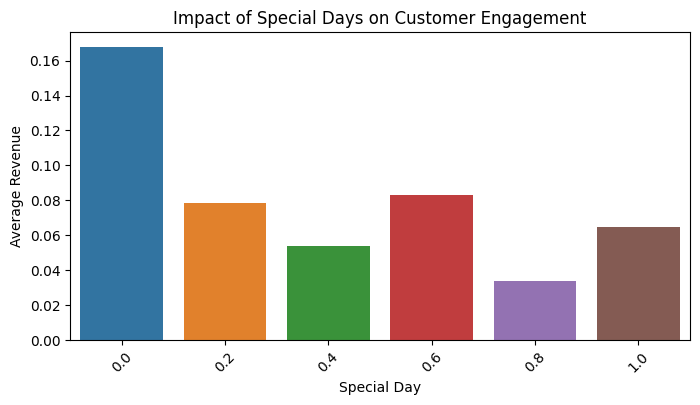

Special Days with the Highest Impact on Customer Engagement:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842


In [23]:
# Group the data by 'SpecialDay' and calculate the average revenue or visitor count
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()  # Replace 'Revenue' with the appropriate metric

# Sort the data in descending order based on the average revenue or visitor count
special_day_analysis = special_day_analysis.sort_values(ascending=False)

# Visualize the impact of special days on customer engagement
plt.figure(figsize=(8, 4))
sns.barplot(x=special_day_analysis.index, y=special_day_analysis.values)
plt.title("Impact of Special Days on Customer Engagement")
plt.xlabel("Special Day")
plt.ylabel("Average Revenue" )
plt.xticks(rotation=45)
plt.show()

# Identify the special days with the highest impact on customer engagement
top_special_days = special_day_analysis.head(3)  # Replace '3' with the desired number of top special days

print("Special Days with the Highest Impact on Customer Engagement:")
for day, impact in top_special_days.items():
    print(f"- {day}: {impact}")

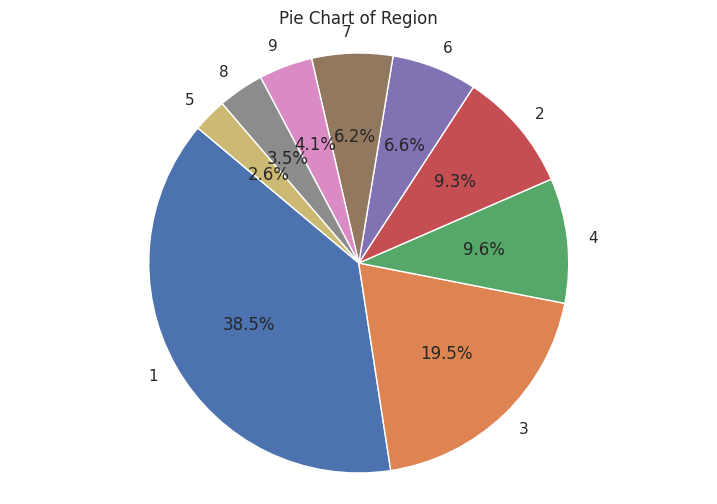

In [57]:
import matplotlib.pyplot as plt

# the frequency of each region
region_freq = df['Region'].value_counts()

# Create a pie chart
plt.figure(figsize=(9,6))
plt.pie(region_freq, labels = region_freq.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Pie Chart of Region')
plt.show()




* Region 1 has the highest frequency with 38.5%, indicating that the majority of online shoppers are coming from this region.
* Region 3 also shows a significant presence at 19.5%.
* Regions 4, 6, and 7 have relatively similar frequencies around 9-10%, indicating a moderate level of online shopping intentions from these regions.
*  
Regions 2, 5, 8, and 9 have lower frequencies, suggesting lesser participation compared to the other regions.




<ipython-input-24-aaf545466cf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

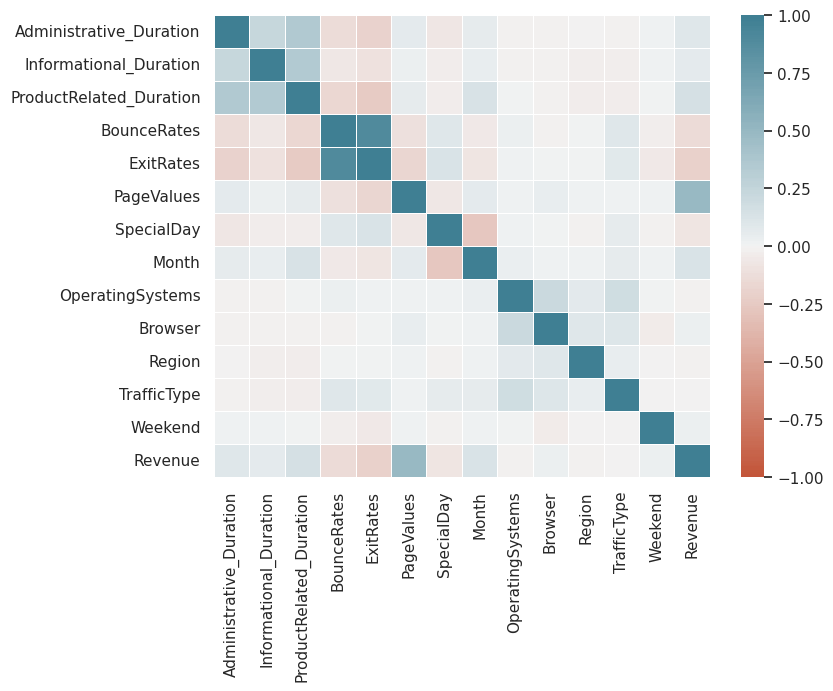

In [24]:
corr=df.corr()
sns.set(style='white')
plt.figure(figsize=(8, 6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.5)





From the above correlation matrix of the online shopper dataset, we can observe that:

The 'ExitRates' and 'BounceRates' features are moderately correlated, which makes sense as both are related to the visitor leaving the website.

The 'PageValues' feature is weakly correlated with the other features, which suggests that it may not have a strong impact on predicting whether a visitor will make a purchase or not.

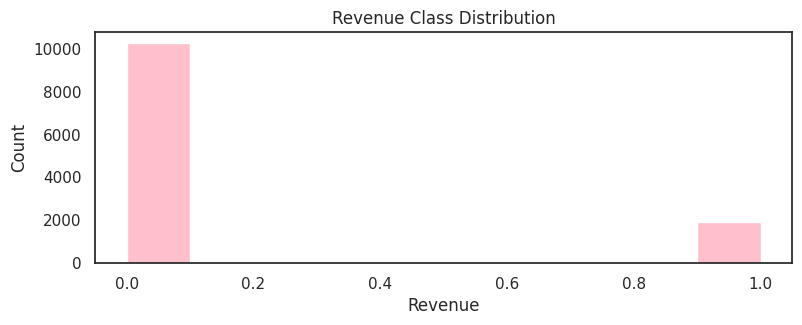

In [25]:
plt.figure(figsize=(9, 3))
plt.hist(df['Revenue'],color='Pink')

plt.title('Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

The above visualization helps to understand the distribution of the target variable, which is the revenue class. In the case of a binary classification problem like this one, it is important to have a balanced distribution of the classes. We can observe that there is a class imbalance here which could lead to a biased model that performs poorly on the minority class.

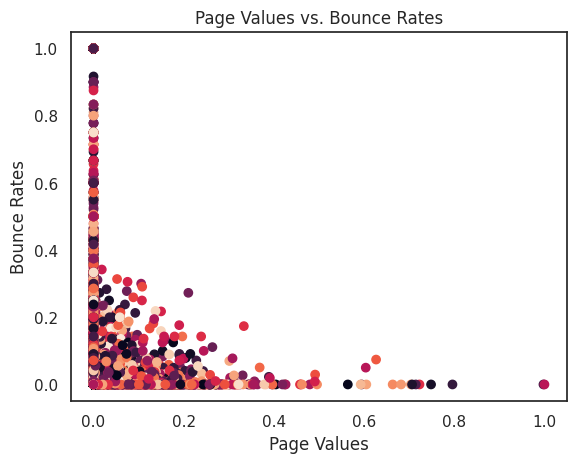

In [26]:
N=len(df)
colors = np.random.rand(N)
plt.scatter(df['PageValues'], df['BounceRates'],c=colors)
plt.title('Page Values vs. Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()



We can observe that there is a general trend where higher page values tend to have lower bounce rates. This could indicate that users are more likely to stay on a website if the page provides them with more valuable information or products. However, there are also many data points with low page values and low bounce rates, suggesting that there may be other factors at play as wel

# Handling Class Imbalance


In [27]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [28]:
df['Revenue'].value_counts()

0    10249
1     1908
Name: Revenue, dtype: int64

In [29]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
y_train.value_counts()

0    8199
1    1526
Name: Revenue, dtype: int64

In [32]:
y_test.value_counts()

0    2050
1     382
Name: Revenue, dtype: int64

In [33]:
X_train.shape

(9725, 14)

In [34]:
X_test.shape

(2432, 14)

In [35]:
X_train[:10]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2811,0.000000,0.000000,0.006888,0.078947,0.232456,0.000000,0.4,5,2,5,3,3,Returning_Visitor,0
4466,0.007473,0.000000,0.046246,0.027027,0.109234,0.015693,0.4,5,2,5,2,3,Returning_Visitor,0
10593,0.031543,0.000000,0.008023,0.000000,0.060150,0.048502,0.0,11,2,2,1,10,Returning_Visitor,0
12153,0.000000,0.000000,0.004357,0.142857,0.214286,0.000000,0.0,12,3,2,1,20,New_Visitor,0
8359,0.000000,0.000000,0.018226,0.129630,0.222222,0.000000,0.0,12,2,5,3,1,Returning_Visitor,1
8743,0.042221,0.118853,0.034389,0.041667,0.138327,0.000000,0.0,11,1,1,1,2,Returning_Visitor,1
11400,0.003089,0.103849,0.157014,0.025126,0.115901,0.000000,0.0,12,2,2,1,2,Returning_Visitor,0
8840,0.019247,0.000000,0.029771,0.024242,0.130303,0.000000,0.0,11,1,1,2,8,Returning_Visitor,0
10633,0.000000,0.000000,0.001485,0.333333,0.666667,0.000000,0.0,11,1,1,9,3,Returning_Visitor,0
8426,0.000000,0.000000,0.010872,0.000000,0.500000,0.000000,0.0,11,2,2,4,1,Returning_Visitor,0




We'll be using SMOTE technique to handle the class imbalance
:
The Synthetic Minority Over-sampling Technique (SMOTE) is an algorithm used in the field of machine learning to address class imbalance in classification tasks.

In [36]:
from imblearn.over_sampling import SMOTE

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Apply SMOTE on the encoded features and target variable
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

# Convert the resampled target variable to a pandas Series
y_sm = pd.Series(y_sm)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [38]:
# Number of classes in training Data
y_train.value_counts()



0    8199
1    8199
Name: Revenue, dtype: int64

# Comparing Machine learning models

In [39]:
import pandas as pd


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9302439024390244
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2050
           1       0.91      0.96      0.93      2050

    accuracy                           0.93      4100
   macro avg       0.93      0.93      0.93      4100
weighted avg       0.93      0.93      0.93      4100



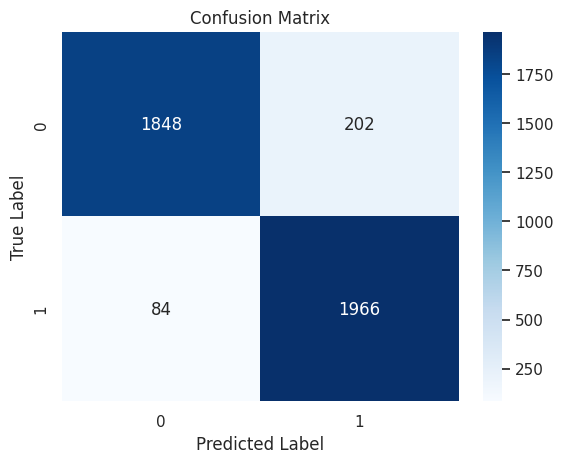

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have X_train, X_test, y_train, and y_test from previous steps

# Instantiate the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training set
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Print accuracy and classification report
print('\nClassification Report (Decision Tree):\n', classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8902439024390244

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      2050
           1       0.88      0.91      0.89      2050

    accuracy                           0.89      4100
   macro avg       0.89      0.89      0.89      4100
weighted avg       0.89      0.89      0.89      4100



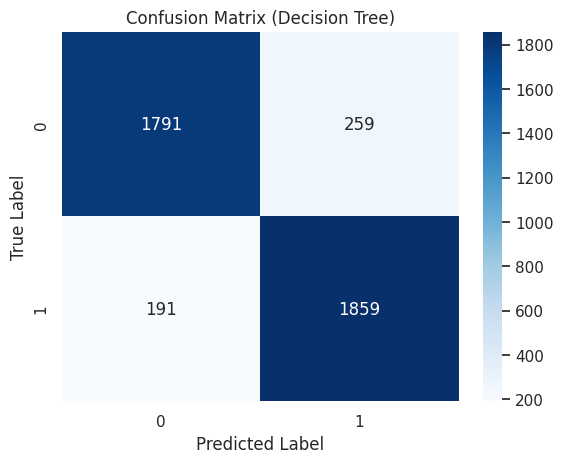

In [43]:
# Assuming you already have X_train, X_test, y_train, and y_test from previous steps
# Create a confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors as needed

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_knn = knn.predict(X_test)

# Calculate accuracy and print classification report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy_knn}')
print('Classification Report (KNN):')
print(classification_report(y_test, y_pred_knn))


Accuracy (KNN): 0.817560975609756
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2050
           1       0.76      0.92      0.83      2050

    accuracy                           0.82      4100
   macro avg       0.83      0.82      0.82      4100
weighted avg       0.83      0.82      0.82      4100



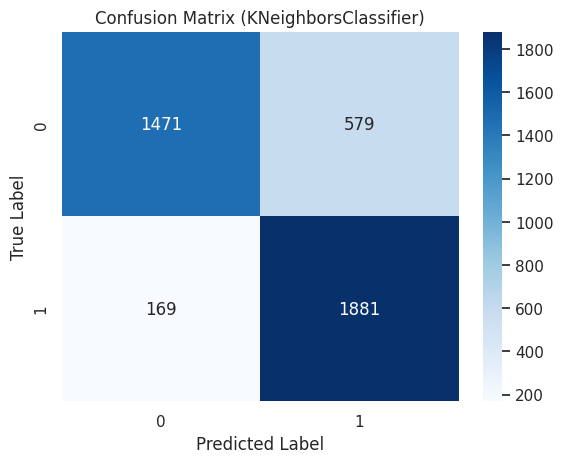

In [45]:
# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (KNeighborsClassifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [46]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_reg = LogisticRegression(random_state=1)

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_logistic = logistic_reg.predict(X_test)

# Calculate accuracy and print classification report
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy_logistic}')
print(classification_report(y_test, y_pred_logistic))


Accuracy: 0.8321951219512195
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2050
           1       0.87      0.78      0.82      2050

    accuracy                           0.83      4100
   macro avg       0.84      0.83      0.83      4100
weighted avg       0.84      0.83      0.83      4100



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


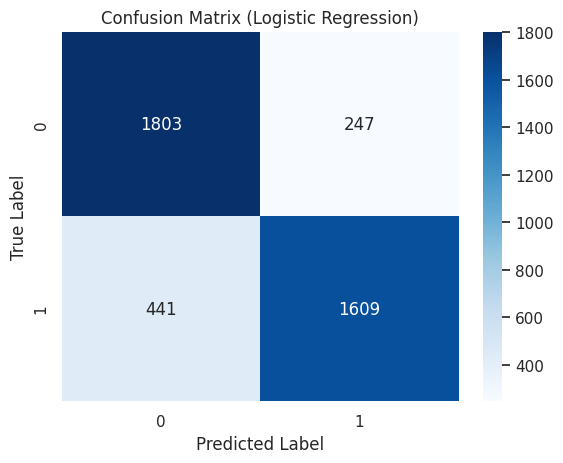

In [47]:
# Create confusion matrix
cm_logistic_reg = confusion_matrix(y_test, y_pred_logistic)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_logistic_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [48]:
from sklearn.linear_model import Perceptron

# Create a Perceptron classifier
perceptron = Perceptron(random_state=1)

# Train the Perceptron on the training set
perceptron.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_perceptron = perceptron.predict(X_test)

# Evaluate the performance of the Perceptron
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f'Perceptron Accuracy: {accuracy_perceptron}')
print('Classification Report for Perceptron:')
print(classification_report(y_test, y_pred_perceptron))


Perceptron Accuracy: 0.7048780487804878
Classification Report for Perceptron:
              precision    recall  f1-score   support

           0       0.91      0.46      0.61      2050
           1       0.64      0.95      0.76      2050

    accuracy                           0.70      4100
   macro avg       0.77      0.70      0.69      4100
weighted avg       0.77      0.70      0.69      4100



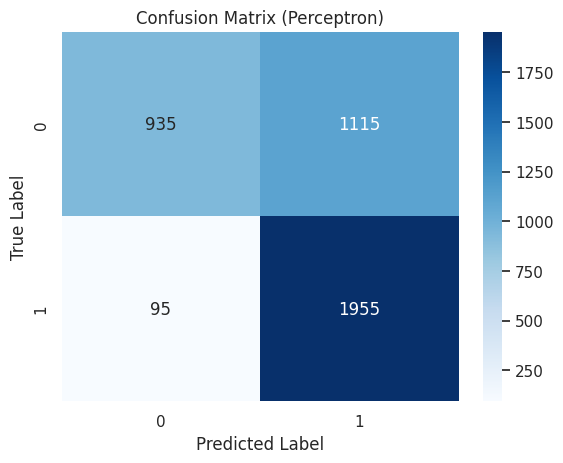

In [49]:
# Create the confusion matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Perceptron)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
from sklearn.svm import SVC

# Create an SVC model
svc = SVC(kernel='rbf', random_state=1)
# 'rbf' is the Radial basis function kernel, you can choose other kernels based on your problem

# Fit the model to the training data
svc.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred_svc = svc.predict(X_test)

# Calculate accuracy and print the classification report
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy: {accuracy_svc}')
print(classification_report(y_test, y_pred_svc))


Accuracy: 0.7002439024390243
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      2050
           1       0.68      0.77      0.72      2050

    accuracy                           0.70      4100
   macro avg       0.70      0.70      0.70      4100
weighted avg       0.70      0.70      0.70      4100



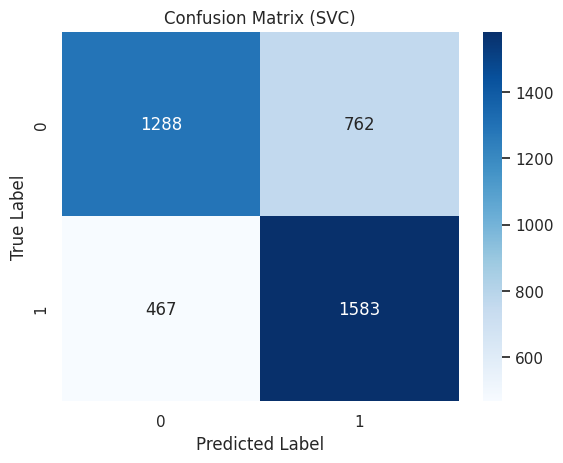

In [51]:
# Create a confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (SVC)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Test!

In [52]:
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [53]:
import pandas as pd
import numpy as np

# Define user input as a dictionary
user_input = {'Administrative_Duration': 50,
              'Informational_Duration': 100,
              'ProductRelated_Duration': 200,
              'BounceRates': 0.05,
              'ExitRates': 0.1,
              'PageValues': 20,
              'SpecialDay': 0,
              'Month': 7,
              'OperatingSystems': 0,
              'Browser': 0,
              'Region': 0,
              'TrafficType': 1,
              'VisitorType': 'New_Visitor',
              'Weekend': 1}

# Create a DataFrame from the user input dictionary
user_df = pd.DataFrame.from_dict(user_input, orient='index').T

# Map VisitorType to binary columns
visitor_type_mapping = {
    'New_Visitor': 1,
    'Other': 0,
    'Returning_Visitor': 0
}
user_df['VisitorType_New_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Other'] = user_df['VisitorType'].map(visitor_type_mapping)
user_df['VisitorType_Returning_Visitor'] = user_df['VisitorType'].map(visitor_type_mapping)

# Drop the original VisitorType column
user_df.drop('VisitorType', axis=1, inplace=True)

# Make a prediction for the user input
prediction = rf.predict(user_df)
print(prediction)

[0]
